In [1]:
%matplotlib inline
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas.io.sql as psql
import psycopg2 as pg
from statsmodels import api as sm
import itertools
plt.style.use('ggplot')

# Database connection
with pg.connect(database='research') as conn:
    sql = 'SELECT full_name, age, size, commits, internal_cohesion, contributor_count, degree_centrality, firm_involvement \
        FROM repositories where id < 1000;'
    data = psql.read_sql(sql, conn)

sub = data[["age", "size", "commits", "internal_cohesion", "firm_involvement", "degree_centrality", "contributor_count"]]
sub_data = sub.copy()

sub_data["age"] = pd.to_numeric(sub_data["age"], errors="coerce")
sub_data["size"] = pd.to_numeric(sub_data["size"], errors="coerce")
sub_data["commits"] = pd.to_numeric(sub_data["commits"], errors="coerce")
sub_data["internal_cohesion"] = pd.to_numeric(sub_data["internal_cohesion"], errors="coerce")
sub_data["firm_involvement"] = pd.to_numeric(sub_data["firm_involvement"], errors="coerce")
sub_data["degree_centrality"] = pd.to_numeric(sub_data["degree_centrality"], errors="coerce")
sub_data["contributor_count"] = pd.to_numeric(sub_data["contributor_count"], errors="coerce")

In [2]:
data.to_csv('data.csv')

## descriptive statistic

In [3]:
labels = ["age", "size", "commits", "internal_cohesion", "firm_involvement", "degree_centrality", "contributor_count"]
ds = pd.DataFrame(index=labels)
# for l in labels:
#     ds[]
ds['mean'] = sub_data.mean()
ds['std'] = sub_data.std()
ds['max'] = sub_data.max()
ds['min'] = sub_data.min()
ds

,mean,std,max,min
age,569.935872,286.939028,1310.0,2
size,16244.716433,51610.624737,823734.0,15
commits,634.119238,1380.129031,14504.0,0
internal_cohesion,1.034713,1.908950,22.5,0
firm_involvement,0.407816,0.491675,1.0,0
degree_centrality,20.064257,52.604582,464.0,0
contributor_count,30.961924,53.275655,465.0,0


In [4]:
sub_data["ic_fi"] = sub_data["internal_cohesion"] * sub_data["firm_involvement"]
sub_data["dc_fi"] = sub_data["degree_centrality"] * sub_data["firm_involvement"]

ic = sub_data["internal_cohesion"]
dc = sub_data["degree_centrality"]
sub_data["ic_n"] = (ic - ic.mean()) / (ic.max() - ic.min())
sub_data["dc_n"] = (dc - dc.mean()) / (dc.max() - dc.min())

ic_fi = sub_data['ic_fi']
dc_fi = sub_data['dc_fi']

sub_data['ic_fi_n'] = (ic_fi - ic_fi.mean()) / (ic_fi.max() - ic_fi.min())
sub_data['dc_fi_n'] = (dc_fi - dc_fi.mean()) / (dc_fi.max() - dc_fi.min())

sub_data['dc_cc'] = sub_data['degree_centrality'] / sub_data['contributor_count']
cc = sub_data['contributor_count']
sub_data['cc_n'] = (cc - cc.mean()) / (cc.max() - cc.min())

sub_data['dc_cc_fi'] = sub_data["dc_cc"] * sub_data["firm_involvement"]


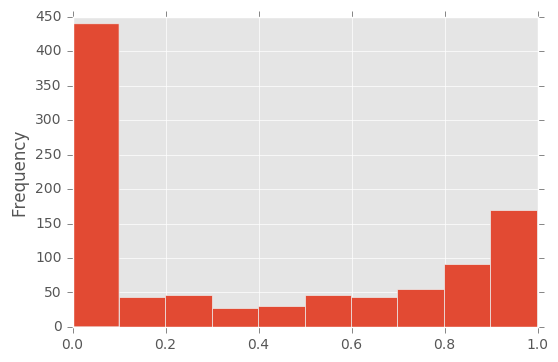

In [5]:
sub_data['dc_cc'].plot.hist()

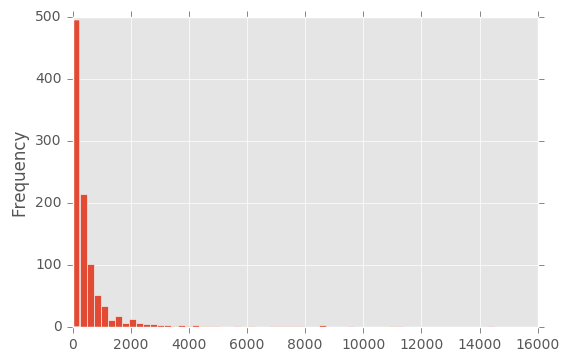

In [6]:
# commits数のヒストグラム
commits_hist = plt.figure()
sub_data['commits'].plot.hist(bins=60)

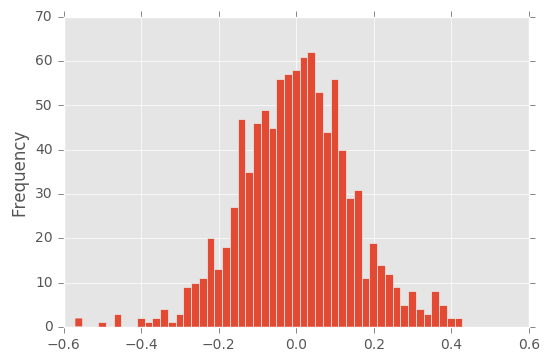

In [7]:
sub_data['ln_commits'] = numpy.log(sub_data['commits'] + 1)
ln_cmt = sub_data["ln_commits"]
sub_data["ln_cmt_n"] = (ln_cmt - ln_cmt.mean()) / (ln_cmt.max() - ln_cmt.min())

sub_data['ln_cmt_n'].plot.hist(bins=50)

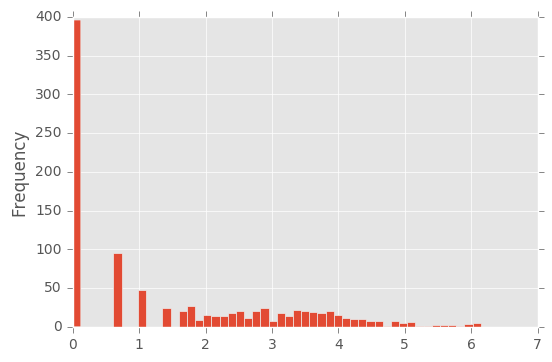

In [8]:
sub_data['ln_dc'] = numpy.log(sub_data['degree_centrality'] + 1)
sub_data['ln_dc'].plot.hist(bins=50)

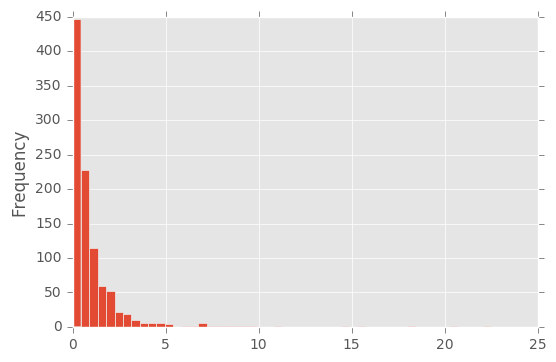

In [9]:
sub_data['internal_cohesion'].plot.hist(bins=50)

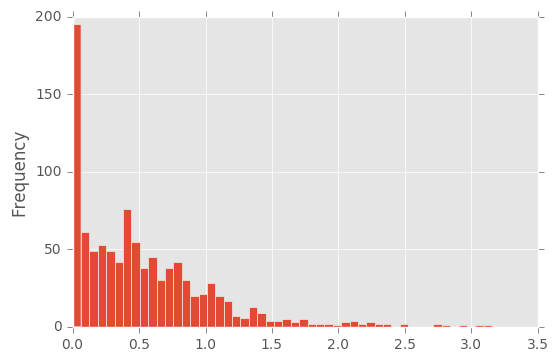

In [10]:
sub_data['ln_ic'] = numpy.log(sub_data['internal_cohesion'] + 1)
sub_data['ln_ic'].plot.hist(bins=50)

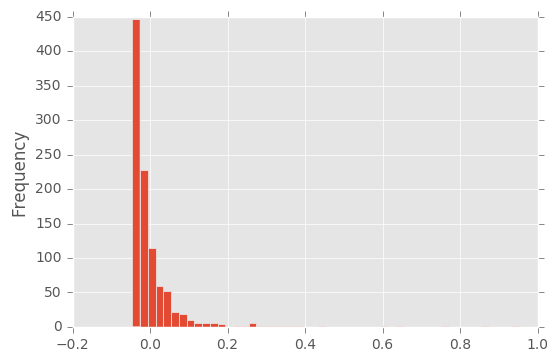

In [11]:
sub_data['ic_n'].plot.hist(bins=50)

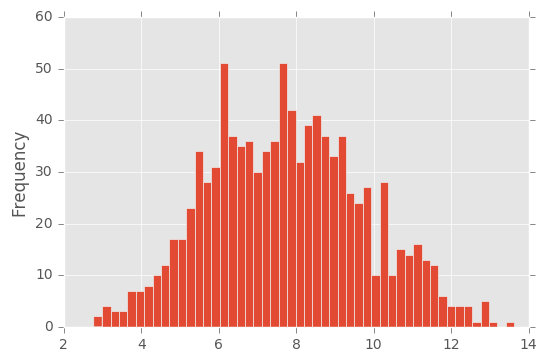

In [12]:
# sub_data['size'].plot.hist(bins=50)
sub_data['ln_size'] = numpy.log(sub_data['size'] + 1)
ln_size = sub_data['ln_size']
sub_data["ln_size_n"] = (ln_size - ln_size.mean()) / (ln_size.max() - ln_size.min())


sub_data['ln_size'].plot.hist(bins=50)

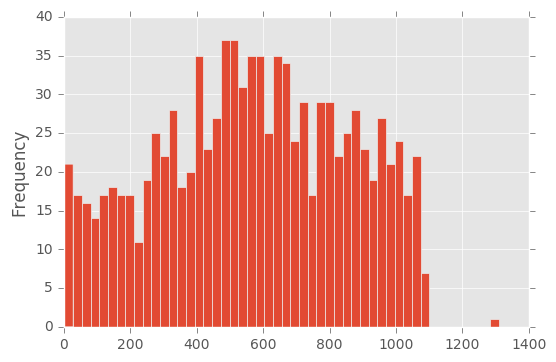

In [13]:
age = sub_data['age']
sub_data["age_n"] = (age - age.mean()) / (age.max() - age.min())



sub_data['age'].plot.hist(bins=50)

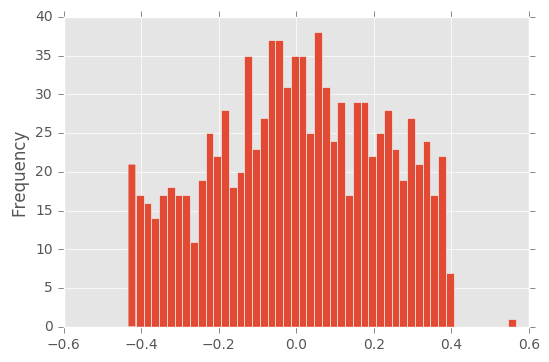

In [14]:
sub_data['age_n'].plot.hist(bins=50)

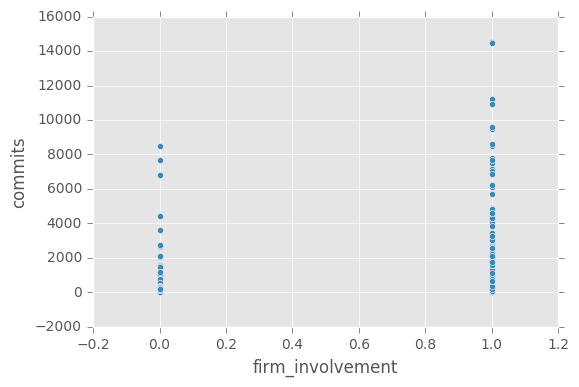

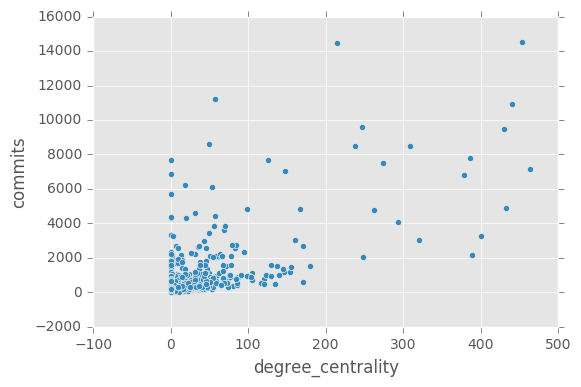

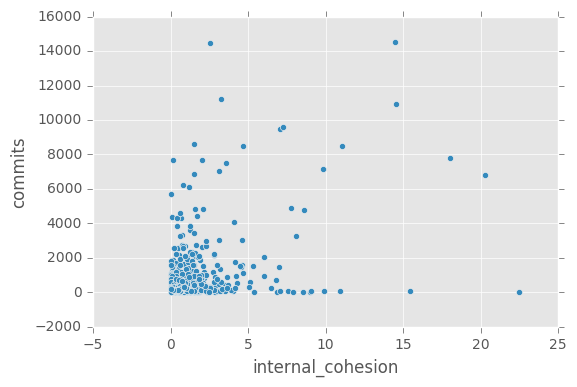

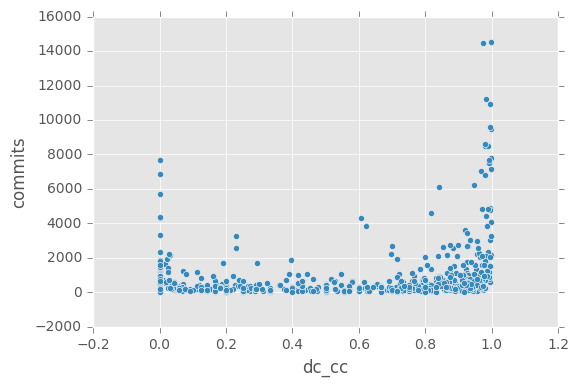

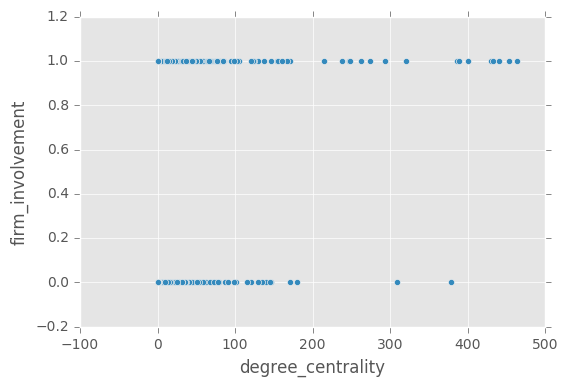

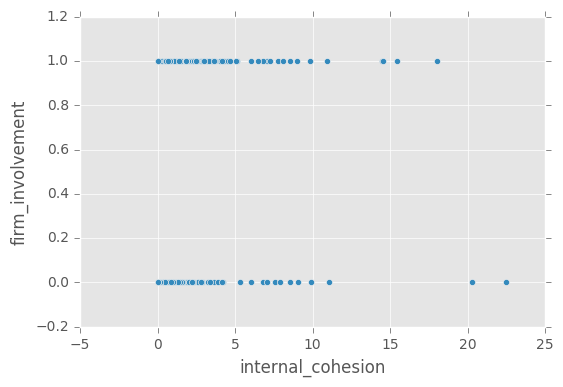

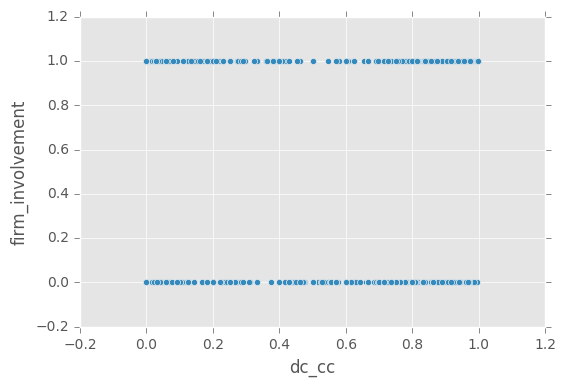

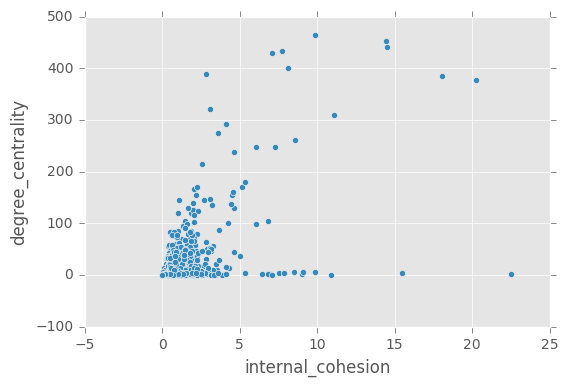

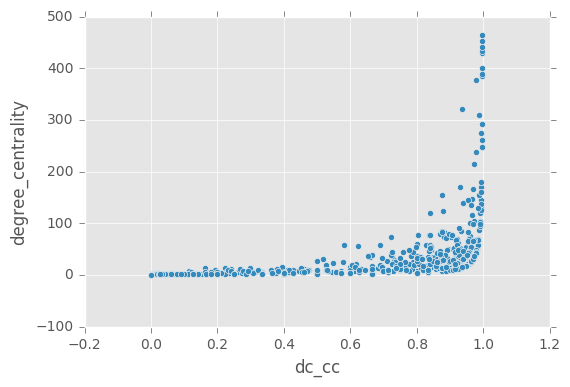

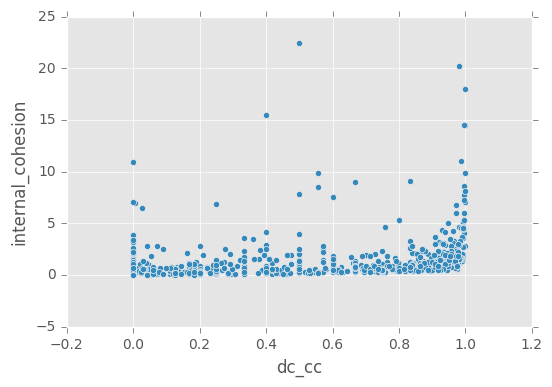

In [15]:
# 散布図
fig = plt.figure()
labels = ['commits', 'firm_involvement', 'degree_centrality', 'internal_cohesion', 'dc_cc']
for l1, l2 in itertools.combinations(labels, 2):
    sub_data.plot(kind='scatter', x=l2, y=l1)

In [16]:
crensed = sub_data.copy()
crensed = crensed[crensed['internal_cohesion'] < 15]


In [17]:
corr = sub_data[["ln_cmt_n", "age_n", "ln_size_n", "ic_n", "firm_involvement", "dc_n"]]
corr_data = corr.copy()

corr_data.corr(method='pearson')

,ln_cmt_n,age_n,ln_size_n,ic_n,firm_involvement,dc_n
ln_cmt_n,1.000000,0.344446,0.500501,0.250111,0.341847,0.494856
age_n,0.344446,1.000000,0.154667,0.052808,0.076691,0.113960
ln_size_n,0.500501,0.154667,1.000000,0.056951,0.215110,0.272165
ic_n,0.250111,0.052808,0.056951,1.000000,0.162765,0.602862
firm_involvement,0.341847,0.076691,0.215110,0.162765,1.000000,0.196396
dc_n,0.494856,0.113960,0.272165,0.602862,0.196396,1.000000


In [18]:
corr = sub_data[["ln_cmt_n", "age_n", "ln_size_n", "ic_n", "firm_involvement", "dc_cc"]]
corr_data = corr.copy()

corr_data.corr(method='pearson')

,ln_cmt_n,age_n,ln_size_n,ic_n,firm_involvement,dc_cc
ln_cmt_n,1.000000,0.344446,0.500501,0.250111,0.341847,0.399689
age_n,0.344446,1.000000,0.154667,0.052808,0.076691,0.139922
ln_size_n,0.500501,0.154667,1.000000,0.056951,0.215110,0.170401
ic_n,0.250111,0.052808,0.056951,1.000000,0.162765,0.356379
firm_involvement,0.341847,0.076691,0.215110,0.162765,1.000000,0.183667
dc_cc,0.399689,0.139922,0.170401,0.356379,0.183667,1.000000


In [19]:
model = sm.formula.ols(formula='ln_cmt_n ~ dc_n + dc_fi_n + ic_n + ic_fi_n + firm_involvement + age_n + ln_size', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cmt_n   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          1.63e-141
Time:                        12:08:24   Log-Likelihood:                 868.95
No. Observations:                 996   AIC:                            -1722.
Df Residuals:                     988   BIC:                            -1683.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.2061      0.014    -15.180      0.000        -0.233    -0.179
firm_involvement[T.True]     0.0689      0.008      8.865      0.000         0.054     0.084
dc_n                         0.7105      0.076      9.349      0.000         0.561     0.860
dc_fi_n                     -0.2920      0.087     -3.367      0.001        -0.462    -0.122
ic_n                        -0.0305      0.064     -0.479      0.632        -0.156     0.095
ic_fi_n                     -0.0831      0.078     -1.067      0.286        -0.236     0.070
age_n                        0.1510      0.015     10.120      0.000         0.122     0.180
ln_size                      0.0231      0.002     13.388      0.000         0.020     0.026
==============================================================================
Omnibus:                       94.104   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.187
Skew:                          -0.693   Prob(JB):                     2.20e-31
Kurtosis:                       4.217   Cond. No.                         318.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model = sm.formula.ols(formula='ic_n ~ firm_involvement', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ic_n   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     27.05
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           2.41e-07
Time:                        12:08:24   Log-Likelihood:                 1057.7
No. Observations:                 996   AIC:                            -2111.
Df Residuals:                     994   BIC:                            -2102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.0115      0.003     -3.325      0.001        -0.018    -0.005
firm_involvement[T.True]     0.0281      0.005      5.201      0.000         0.017     0.039
==============================================================================
Omnibus:                     1144.311   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91888.134
Skew:                           5.741   Prob(JB):                         0.00
Kurtosis:                      48.633   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model = sm.formula.ols(formula='dc_n ~ firm_involvement', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dc_n   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     39.88
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           4.07e-10
Time:                        12:08:24   Log-Likelihood:                 775.20
No. Observations:                 996   AIC:                            -1546.
Df Residuals:                     994   BIC:                            -1537.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.0185      0.005     -4.037      0.000        -0.027    -0.010
firm_involvement[T.True]     0.0453      0.007      6.315      0.000         0.031     0.059
==============================================================================
Omnibus:                     1050.346   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48801.623
Skew:                           5.181   Prob(JB):                         0.00
Kurtosis:                      35.689   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model = sm.formula.ols(formula='ln_cmt_n ~ dc_n + dc_fi_n + firm_involvement + age_n + ln_size_n', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cmt_n   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     192.1
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          4.77e-143
Time:                        12:08:24   Log-Likelihood:                 867.20
No. Observations:                 996   AIC:                            -1722.
Df Residuals:                     990   BIC:                            -1693.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.0254      0.004     -5.811      0.000        -0.034    -0.017
firm_involvement[T.True]     0.0646      0.007      8.935      0.000         0.050     0.079
dc_n                         0.6901      0.065     10.569      0.000         0.562     0.818
dc_fi_n                     -0.3278      0.072     -4.538      0.000        -0.470    -0.186
age_n                        0.1509      0.015     10.106      0.000         0.122     0.180
ln_size_n                    0.2549      0.018     13.788      0.000         0.219     0.291
==============================================================================
Omnibus:                       95.492   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.003
Skew:                          -0.699   Prob(JB):                     5.37e-32
Kurtosis:                       4.231   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model = sm.formula.ols(formula='ln_cmt_n ~ dc_cc + dc_fi_n +  ic_n + ic_fi_n + firm_involvement + age_n + ln_size_n', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cmt_n   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     129.4
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          6.87e-135
Time:                        12:08:24   Log-Likelihood:                 853.49
No. Observations:                 996   AIC:                            -1691.
Df Residuals:                     988   BIC:                            -1652.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.0470      0.006     -8.409      0.000        -0.058    -0.036
firm_involvement[T.True]     0.0536      0.008      6.816      0.000         0.038     0.069
dc_cc                        0.0692      0.009      7.384      0.000         0.051     0.088
dc_fi_n                      0.3207      0.047      6.803      0.000         0.228     0.413
ic_n                         0.1720      0.057      3.002      0.003         0.060     0.284
ic_fi_n                     -0.2498      0.075     -3.310      0.001        -0.398    -0.102
age_n                        0.1486      0.015      9.774      0.000         0.119     0.178
ln_size_n                    0.2728      0.019     14.576      0.000         0.236     0.310
==============================================================================
Omnibus:                       71.895   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.993
Skew:                          -0.612   Prob(JB):                     2.36e-21
Kurtosis:                       3.888   Cond. No.                         31.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model = sm.formula.ols(formula='ln_cmt_n ~ dc_cc + dc_fi_n + firm_involvement + age_n + ln_size_n', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cmt_n   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          1.93e-134
Time:                        12:08:24   Log-Likelihood:                 847.20
No. Observations:                 996   AIC:                            -1682.
Df Residuals:                     990   BIC:                            -1653.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.0449      0.005     -8.172      0.000        -0.056    -0.034
firm_involvement[T.True]     0.0426      0.007      5.942      0.000         0.029     0.057
dc_cc                        0.0755      0.009      8.266      0.000         0.058     0.093
dc_fi_n                      0.2553      0.036      7.152      0.000         0.185     0.325
age_n                        0.1478      0.015      9.672      0.000         0.118     0.178
ln_size_n                    0.2738      0.019     14.640      0.000         0.237     0.310
==============================================================================
Omnibus:                       68.463   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.265
Skew:                          -0.568   Prob(JB):                     2.06e-21
Kurtosis:                       4.003   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model = sm.formula.ols(formula='ln_cmt_n ~ dc_cc + dc_fi_n +  ic_n + ic_fi_n + firm_involvement + age_n + ln_size_n', data=crensed)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cmt_n   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     126.1
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          3.52e-132
Time:                        12:08:24   Log-Likelihood:                 851.25
No. Observations:                 992   AIC:                            -1686.
Df Residuals:                     984   BIC:                            -1647.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.0472      0.006     -8.286      0.000        -0.058    -0.036
firm_involvement[T.True]     0.0561      0.008      6.831      0.000         0.040     0.072
dc_cc                        0.0673      0.010      7.073      0.000         0.049     0.086
dc_fi_n                      0.3266      0.050      6.501      0.000         0.228     0.425
ic_n                         0.2318      0.081      2.853      0.004         0.072     0.391
ic_fi_n                     -0.3071      0.097     -3.155      0.002        -0.498    -0.116
age_n                        0.1469      0.015      9.645      0.000         0.117     0.177
ln_size_n                    0.2696      0.019     14.349      0.000         0.233     0.307
==============================================================================
Omnibus:                       72.329   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.459
Skew:                          -0.618   Prob(JB):                     1.87e-21
Kurtosis:                       3.885   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

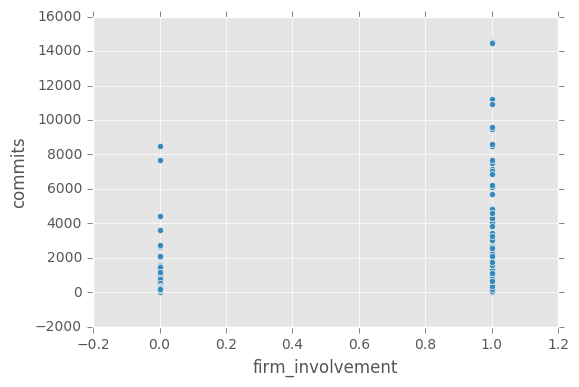

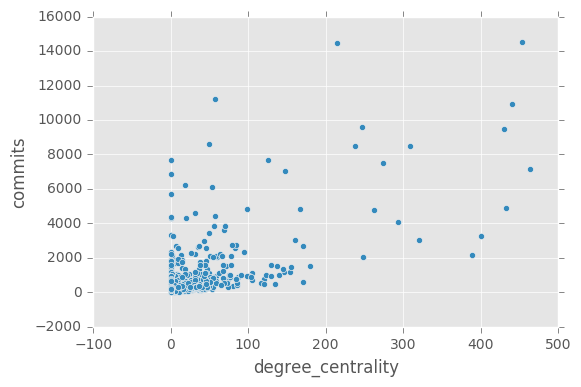

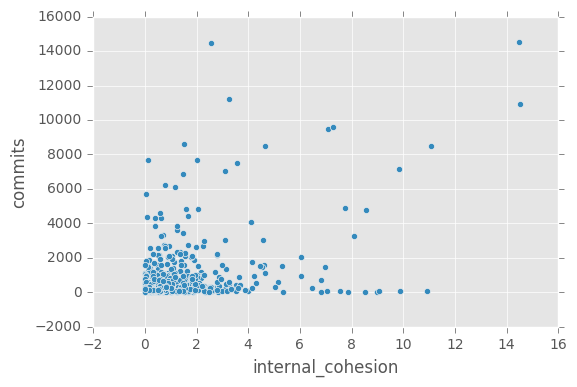

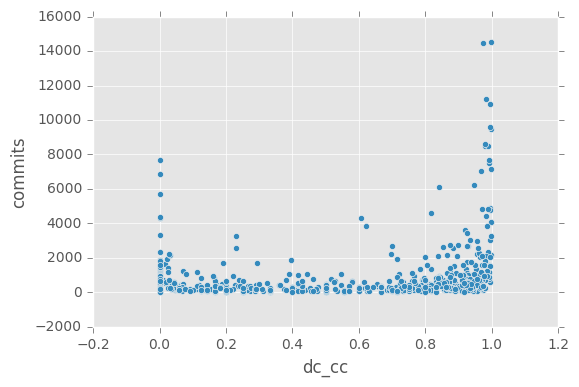

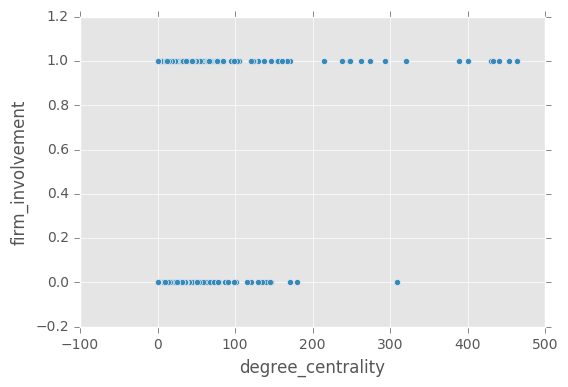

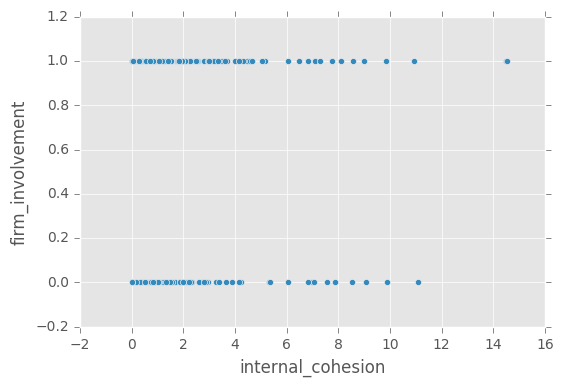

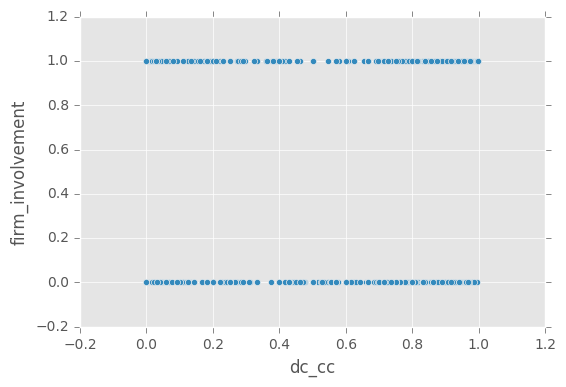

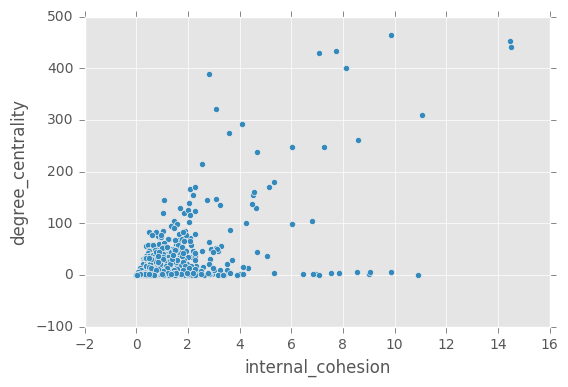

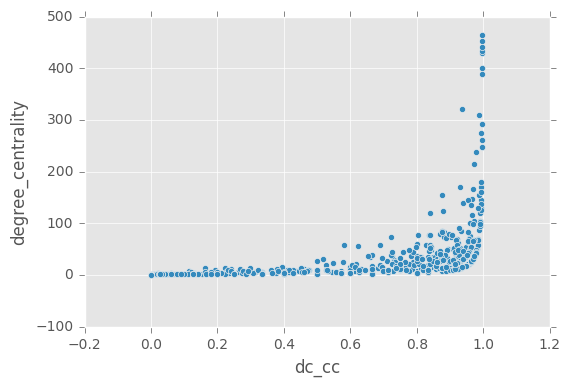

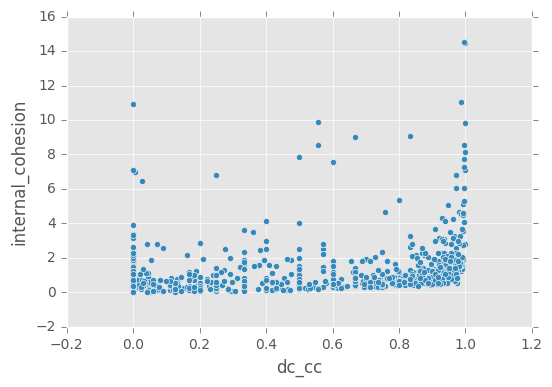

In [26]:
# 散布図
fig = plt.figure()
labels = ['commits', 'firm_involvement', 'degree_centrality', 'internal_cohesion', 'dc_cc']
for l1, l2 in itertools.combinations(labels, 2):
    crensed.plot(kind='scatter', x=l2, y=l1)

In [27]:
model = sm.formula.ols(formula='ln_cmt_n ~ dc_cc + dc_cc_fi +  ic_n + ic_fi + firm_involvement + age_n + ln_size_n', data=sub_data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cmt_n   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          3.52e-125
Time:                        12:08:27   Log-Likelihood:                 830.82
No. Observations:                 996   AIC:                            -1646.
Df Residuals:                     988   BIC:                            -1606.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.0509      0.006     -8.261      0.000        -0.063    -0.039
firm_involvement[T.True]     0.0474      0.010      4.764      0.000         0.028     0.067
dc_cc                        0.0795      0.013      6.334      0.000         0.055     0.104
dc_cc_fi                     0.0093      0.018      0.503      0.615        -0.027     0.046
ic_n                         0.1586      0.060      2.651      0.008         0.041     0.276
ic_fi                        0.0013      0.004      0.344      0.731        -0.006     0.009
age_n                        0.1491      0.016      9.581      0.000         0.119     0.180
ln_size_n                    0.2955      0.019     15.682      0.000         0.259     0.332
==============================================================================
Omnibus:                       84.781   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.900
Skew:                          -0.666   Prob(JB):                     1.52e-26
Kurtosis:                       4.043   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 層別
- コミッターの数
- age
でグループ分け

In [28]:
data_c_large = sub_data.copy()
data_c_large = data_c_large[data_c_large['contributor_count'] > 30]

data_c_small = sub_data.copy()
data_c_small = data_c_small[data_c_small['contributor_count'] <= 30]

data_a_large = sub_data.copy()
data_a_large = data_a_large[data_a_large['age'] > 500]

data_a_small = sub_data.copy()
data_a_small = data_a_small[data_a_small['age'] <= 500]


In [29]:
model = sm.formula.ols(formula='ln_cmt_n ~ dc_cc + dc_cc_fi +  ic_n + ic_fi + firm_involvement + age_n + ln_size_n', data=data_c_large)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cmt_n   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     53.24
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           3.70e-47
Time:                        12:08:27   Log-Likelihood:                 350.77
No. Observations:                 275   AIC:                            -685.5
Df Residuals:                     267   BIC:                            -656.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                    0.0657      0.013      5.107      0.000         0.040     0.091
firm_involvement[T.True]     0.0326      0.017      1.955      0.052        -0.000     0.065
dc_cc                        0.0085      0.017      0.488      0.626        -0.026     0.043
dc_cc_fi                     0.0092      0.023      0.402      0.688        -0.036     0.054
ic_n                         0.3015      0.066      4.537      0.000         0.171     0.432
ic_fi                       -0.0023      0.004     -0.619      0.537        -0.009     0.005
age_n                        0.0329      0.022      1.495      0.136        -0.010     0.076
ln_size_n                    0.3513      0.026     13.471      0.000         0.300     0.403
==============================================================================
Omnibus:                        4.143   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                4.618
Skew:                          -0.133   Prob(JB):                       0.0993
Kurtosis:                       3.576   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model = sm.formula.ols(formula='ln_cmt_n ~ dc_cc + dc_cc_fi +  ic_n + ic_fi + firm_involvement + age_n + ln_size_n', data=data_c_small)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cmt_n   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     40.02
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           1.55e-47
Time:                        12:08:27   Log-Likelihood:                 619.03
No. Observations:                 721   AIC:                            -1222.
Df Residuals:                     713   BIC:                            -1185.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.0678      0.007    -10.322      0.000        -0.081    -0.055
firm_involvement[T.True]     0.0475      0.011      4.246      0.000         0.026     0.069
dc_cc                        0.0483      0.015      3.129      0.002         0.018     0.079
dc_cc_fi                     0.0151      0.024      0.622      0.534        -0.033     0.063
ic_n                        -0.0514      0.074     -0.697      0.486        -0.196     0.093
ic_fi                       -0.0068      0.006     -1.233      0.218        -0.018     0.004
age_n                        0.1519      0.017      8.692      0.000         0.118     0.186
ln_size_n                    0.2024      0.022      9.234      0.000         0.159     0.245
==============================================================================
Omnibus:                       45.246   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.735
Skew:                          -0.526   Prob(JB):                     3.93e-14
Kurtosis:                       3.973   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model = sm.formula.ols(formula='ln_cmt_n ~ dc_cc + dc_cc_fi +  ic_n + ic_fi + firm_involvement + age_n + ln_size_n', data=data_a_small)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cmt_n   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     51.18
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           1.14e-51
Time:                        12:08:27   Log-Likelihood:                 338.51
No. Observations:                 403   AIC:                            -661.0
Df Residuals:                     395   BIC:                            -629.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.0147      0.014     -1.023      0.307        -0.043     0.014
firm_involvement[T.True]     0.0645      0.016      4.133      0.000         0.034     0.095
dc_cc                        0.0983      0.021      4.746      0.000         0.058     0.139
dc_cc_fi                    -0.0242      0.032     -0.763      0.446        -0.087     0.038
ic_n                         0.1211      0.071      1.704      0.089        -0.019     0.261
ic_fi                        0.0105      0.007      1.592      0.112        -0.002     0.024
age_n                        0.3547      0.047      7.511      0.000         0.262     0.448
ln_size_n                    0.2434      0.029      8.333      0.000         0.186     0.301
==============================================================================
Omnibus:                       12.604   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.953
Skew:                          -0.405   Prob(JB):                      0.00154
Kurtosis:                       3.339   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model = sm.formula.ols(formula='ln_cmt_n ~ dc_cc + dc_cc_fi +  ic_n + ic_fi + firm_involvement + age_n + ln_size_n', data=data_a_large)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cmt_n   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     56.95
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           4.60e-62
Time:                        12:08:27   Log-Likelihood:                 509.12
No. Observations:                 593   AIC:                            -1002.
Df Residuals:                     585   BIC:                            -967.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.0346      0.010     -3.643      0.000        -0.053    -0.016
firm_involvement[T.True]     0.0315      0.013      2.450      0.015         0.006     0.057
dc_cc                        0.0613      0.016      3.875      0.000         0.030     0.092
dc_cc_fi                     0.0329      0.023      1.449      0.148        -0.012     0.078
ic_n                         0.2052      0.111      1.855      0.064        -0.012     0.422
ic_fi                       -0.0024      0.006     -0.427      0.670        -0.014     0.009
age_n                        0.0985      0.033      2.968      0.003         0.033     0.164
ln_size_n                    0.3235      0.024     13.313      0.000         0.276     0.371
==============================================================================
Omnibus:                       76.795   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.126
Skew:                          -0.827   Prob(JB):                     4.09e-28
Kurtosis:                       4.539   Cond. No.                         51.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
ft = sub_data[sub_data['firm_involvement'] == True]
ff_n = sub_data[sub_data['firm_involvement'] == False]

In [34]:
from scipy.stats import ttest_ind

cat1 = my_data[my_data['Category']=='cat1']
cat2 = my_data[my_data['Category']=='cat2']

ttest_ind(cat1['values'], cat2['values'])


NameError: name 'my_data' is not defined

In [35]:
stats.ttest_ind(ft['ic_n'].dropna(axis=0), ff_n['ic_n'].dropna(axis=0), equal_var = False)

Ttest_indResult(statistic=5.019862782579831, pvalue=6.4474173019102956e-07)

In [36]:
stats.ttest_ind(ft['dc_cc'].dropna(axis=0), ff_n['dc_cc'].dropna(axis=0), equal_var = False)

Ttest_indResult(statistic=5.7697133830257545, pvalue=1.1315113128219833e-08)

In [37]:
ft['dc_cc'].mean()

0.46410261667416675

In [38]:
ff_n['dc_cc'].mean()

0.3173639522355687

In [39]:
ft['ic_n'].mean()

0.016604066359900953

In [40]:
ff_n['ic_n'].mean()

-0.01147343804495706

In [41]:
stats.ttest_ind(ff_n['ic_n'].dropna(axis=0), ft['ic_n'].dropna(axis=0), equal_var = False)

Ttest_indResult(statistic=-5.019862782579831, pvalue=6.4474173019102956e-07)